# Setting up the Data


This is the Airbnb data 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BAN/LA_Airbnb_Data13.csv')  #imported the data from insideairbnb.com 

In [ ]:
df.head(10) 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,n,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7.774520e+17,https://www.airbnb.com/rooms/777451666060243581,2.023030e+13,3/7/23,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,6.980980e+17,https://www.airbnb.com/rooms/698097753730921190,2.023030e+13,3/7/23,city scrape,æ–¹ä¾¿æ˜“å±…é©¿ç«™,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,1.306312e+07,https://www.airbnb.com/rooms/13063118,2.023030e+13,3/7/23,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,3.933708e+07,https://www.airbnb.com/rooms/39337076,2.023030e+13,3/7/23,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/Hosting-...,208375458,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,1.307763e+07,https://www.airbnb.com/rooms/13077628,2.023030e+13,3/7/23,city scrape,Zuma Malibu Retreat,Our Private 16 Acre Malibu Retreat is located ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4182067,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18
5,5.185963e+07,https://www.airbnb.com/rooms/51859630,2.023030e+13,3/9/23,city scrape,"Single BR with King size bed, and shared bathroom",Gorgeous updated 1929 Craftsman Style Home loc...,Central San Pedro offers easy access to Port a...,https://a0.muscache.com/pictures/6ae55106-d3e8...,28407733,...,5.00,5.00,5.00,NaN,f,1,0,1,0,3.00
6,5.319221e+07,https://www.airbnb.com/rooms/53192213,2.023030e+13,3/7/23,city scrape,Premium & New remodel Cozy Queen bed room,"Good location , 2 min to Walmart and resturan...",NaN,https://a0.muscache.com/pictures/7dd6465b-3c4f...,21266818,...,4.33,4.83,4.42,NaN,f,2,0,2,0,0.76
7,3.231822e+07,https://www.airbnb.com/rooms/32318222,2.023030e+13,3/7/23,city scrape,Relaxing and private room,NaN,NaN,https://a0.muscache.com/pictures/896f6f03-e1b6...,242361385,...,4.80,4.72,4.88,NaN,f,1,0,1,0,1.77
8,7.520850e+17,https://www.airbnb.com/rooms/752085451221941310,2.023030e+13,3/7/23,city scrape,Unique Starry Night Skoolie for Desert Glamping,Less crowded than Joshua Tree with a better st...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,486200100,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.49
9,5.435214e+07,https://www.airbnb.com/rooms/54352139,2.023030e+13,3/7/23,city scrape,Awesome new and improved guest house with new AC,Stay comfortable in this great and convenient ...,This is a family oriented neighborhood. We mov...,https://a0.muscache.com/pictures/miso/Hosting-...,193287876,...,4.96,4.92,4.86,NaN,f,1,1,0,0,5.24


# Cleaning the data

Going through the data, we see there are many variables that would not be relevant to our analysis therefore we are going to create a subset of df purely for numerical analysis called df2.

In [ ]:
df.dtypes


id                                              float64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
n                                                 int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 77, dtype: object

Now we are dropping variables to make the data suitable for numerical analysis. 

In [ ]:
df.shape #column count before drop


(42451, 77)

The column 'neighbourhood_overview' has incorrect spelling. I was unsuccessful in renaming it.

Also, I am dropping multiple unneeded variables.

In [ ]:
df.rename({'neighborhood_overview': 'neighbourhood_overview'}, inplace=True) #I was unsuccessful in changing the column name with incorrect spelling

In [ ]:
df1 = df.drop(['id','listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_response_time', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type'], axis=1)

In [ ]:
df1.shape

(42451, 52)

I have now dropped 25 columns to come to a number of 50 columns from 75 columns.

In [ ]:
df1.head(10)

,description,host_since_years,host_location,host_response_rate,host_acceptance_rate,hos1_is_superhos1,host_listings_count,host_total_listings_count,hos1_iden1i1y_veri0ied,accommodates,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,n,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Relax with the whole family at this peaceful p...,1.0,NaN,100%,0%,0.0,1.0,1.0,1.0,7,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,NaN,1.0,NaN,100%,100%,1.0,4.0,5.0,1.0,2,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,LOCATION! Luxury upstairs Oceanside Casita gue...,8.0,NaN,100%,86%,0.0,15.0,22.0,1.0,3,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,Welcome to our new cozy duplex!<br /><br />Loc...,5.0,"Rancho Palos Verdes, CA",100%,99%,1.0,4.0,6.0,1.0,2,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,Our Private 16 Acre Malibu Retreat is located ...,11.0,"Malibu, CA",100%,NaN,0.0,1.0,6.0,1.0,8,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18
5,Gorgeous updated 1929 Craftsman Style Home loc...,8.0,"Los Angeles, CA",100%,100%,0.0,1.0,4.0,1.0,1,...,5.00,5.00,5.00,NaN,f,1,0,1,0,3.00
6,"Good location , 2 min to Walmart and resturan...",9.0,"Chino, CA",80%,100%,0.0,3.0,19.0,1.0,1,...,4.33,4.83,4.42,NaN,f,2,0,2,0,0.76
7,NaN,4.0,NaN,100%,63%,0.0,1.0,1.0,1.0,2,...,4.80,4.72,4.88,NaN,f,1,0,1,0,1.77
8,Less crowded than Joshua Tree with a better st...,1.0,"Lake Los Angeles, CA",80%,100%,0.0,1.0,1.0,1.0,2,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.49
9,Stay comfortable in this great and convenient ...,5.0,"Torrance, CA",100%,100%,1.0,1.0,1.0,1.0,2,...,4.96,4.92,4.86,NaN,f,1,1,0,0,5.24


In [ ]:
df2 = df1.drop(['description', 'bathrooms'], axis=1)

In [ ]:
df3 = df2.drop(['n','host_listings_count','bathrooms_text','amenities', 'calendar_updated','license','calendar_updated','calendar_updated','host_location', 'host_response_rate', 'host_acceptance_rate', 'availability_30', 'availability_60', 'availability_90', 'review_scores_cleanliness', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'review_scores_communication', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'number_of_reviews_ltm', 'number_of_reviews_l30d','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], axis=1)


In [ ]:
df3 = df3[df3['maximum_nights'] < 3250]

# Descriptive Statistics

In [ ]:
type(df1) == 'category' #We have no categorical variables that require dropping

False

Because we have text values and we plan to do a text analysis with the description column we will have do a seperate df excluding the description column


In [ ]:
df3.dtypes

host_since_years                  float64
hos1_is_superhos1                 float64
host_total_listings_count         float64
hos1_iden1i1y_veri0ied            float64
accommodates                        int64
Bathroom type                      object
Unnamed: 38                        object
bedrooms                          float64
beds                              float64
price                              object
minimum_nights                      int64
maximum_nights                      int64
minimum_nights_avg_ntm            float64
maximum_nights_avg_ntm            float64
has_availability                   object
availability_365                    int64
calendar_last_scraped              object
number_of_reviews                   int64
first_review                       object
last_review                        object
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_value               float64
instant_bookable                  

we are keeping price and **ask the professor what to do with date/time data, first review, last review**

In [ ]:
df3['price'].describe()

count        42450
unique        1572
top       $150.00 
freq          1243
Name: price, dtype: object

In [ ]:
df3['price'].head(10)

0      $399.00 
1       $46.00 
2      $408.00 
3       $80.00 
4    $2,138.00 
5       $55.00 
6       $60.00 
7       $55.00 
8      $129.00 
9      $107.00 
Name: price, dtype: object

# Fixing the Price Column

The price column has a non numerical variable attached which we are about to remove with a delimiter

In [ ]:
df3[['price','price']] = df['price'].str.split('$',expand=True)

In [ ]:
df3['price'].head(10)

0      399.00 
1       46.00 
2      408.00 
3       80.00 
4    2,138.00 
5       55.00 
6       60.00 
7       55.00 
8      129.00 
9      107.00 
Name: price, dtype: object

In [ ]:
df3['price'].head(10)

0      399.00 
1       46.00 
2      408.00 
3       80.00 
4    2,138.00 
5       55.00 
6       60.00 
7       55.00 
8      129.00 
9      107.00 
Name: price, dtype: object

In [ ]:
df3['price'] = df3['price'].str.replace(',', '') #removed all the commas in the column to convert the column type to an integer 


In [ ]:
df3['price'] = df3['price'].astype('float').astype('int')


In [ ]:
df3['price'].dtype

dtype('int64')

In [ ]:
df3['price'].describe()

count    42450.000000
mean       283.338304
std       1081.159093
min          0.000000
25%         89.000000
50%        145.000000
75%        246.000000
max      99999.000000
Name: price, dtype: float64

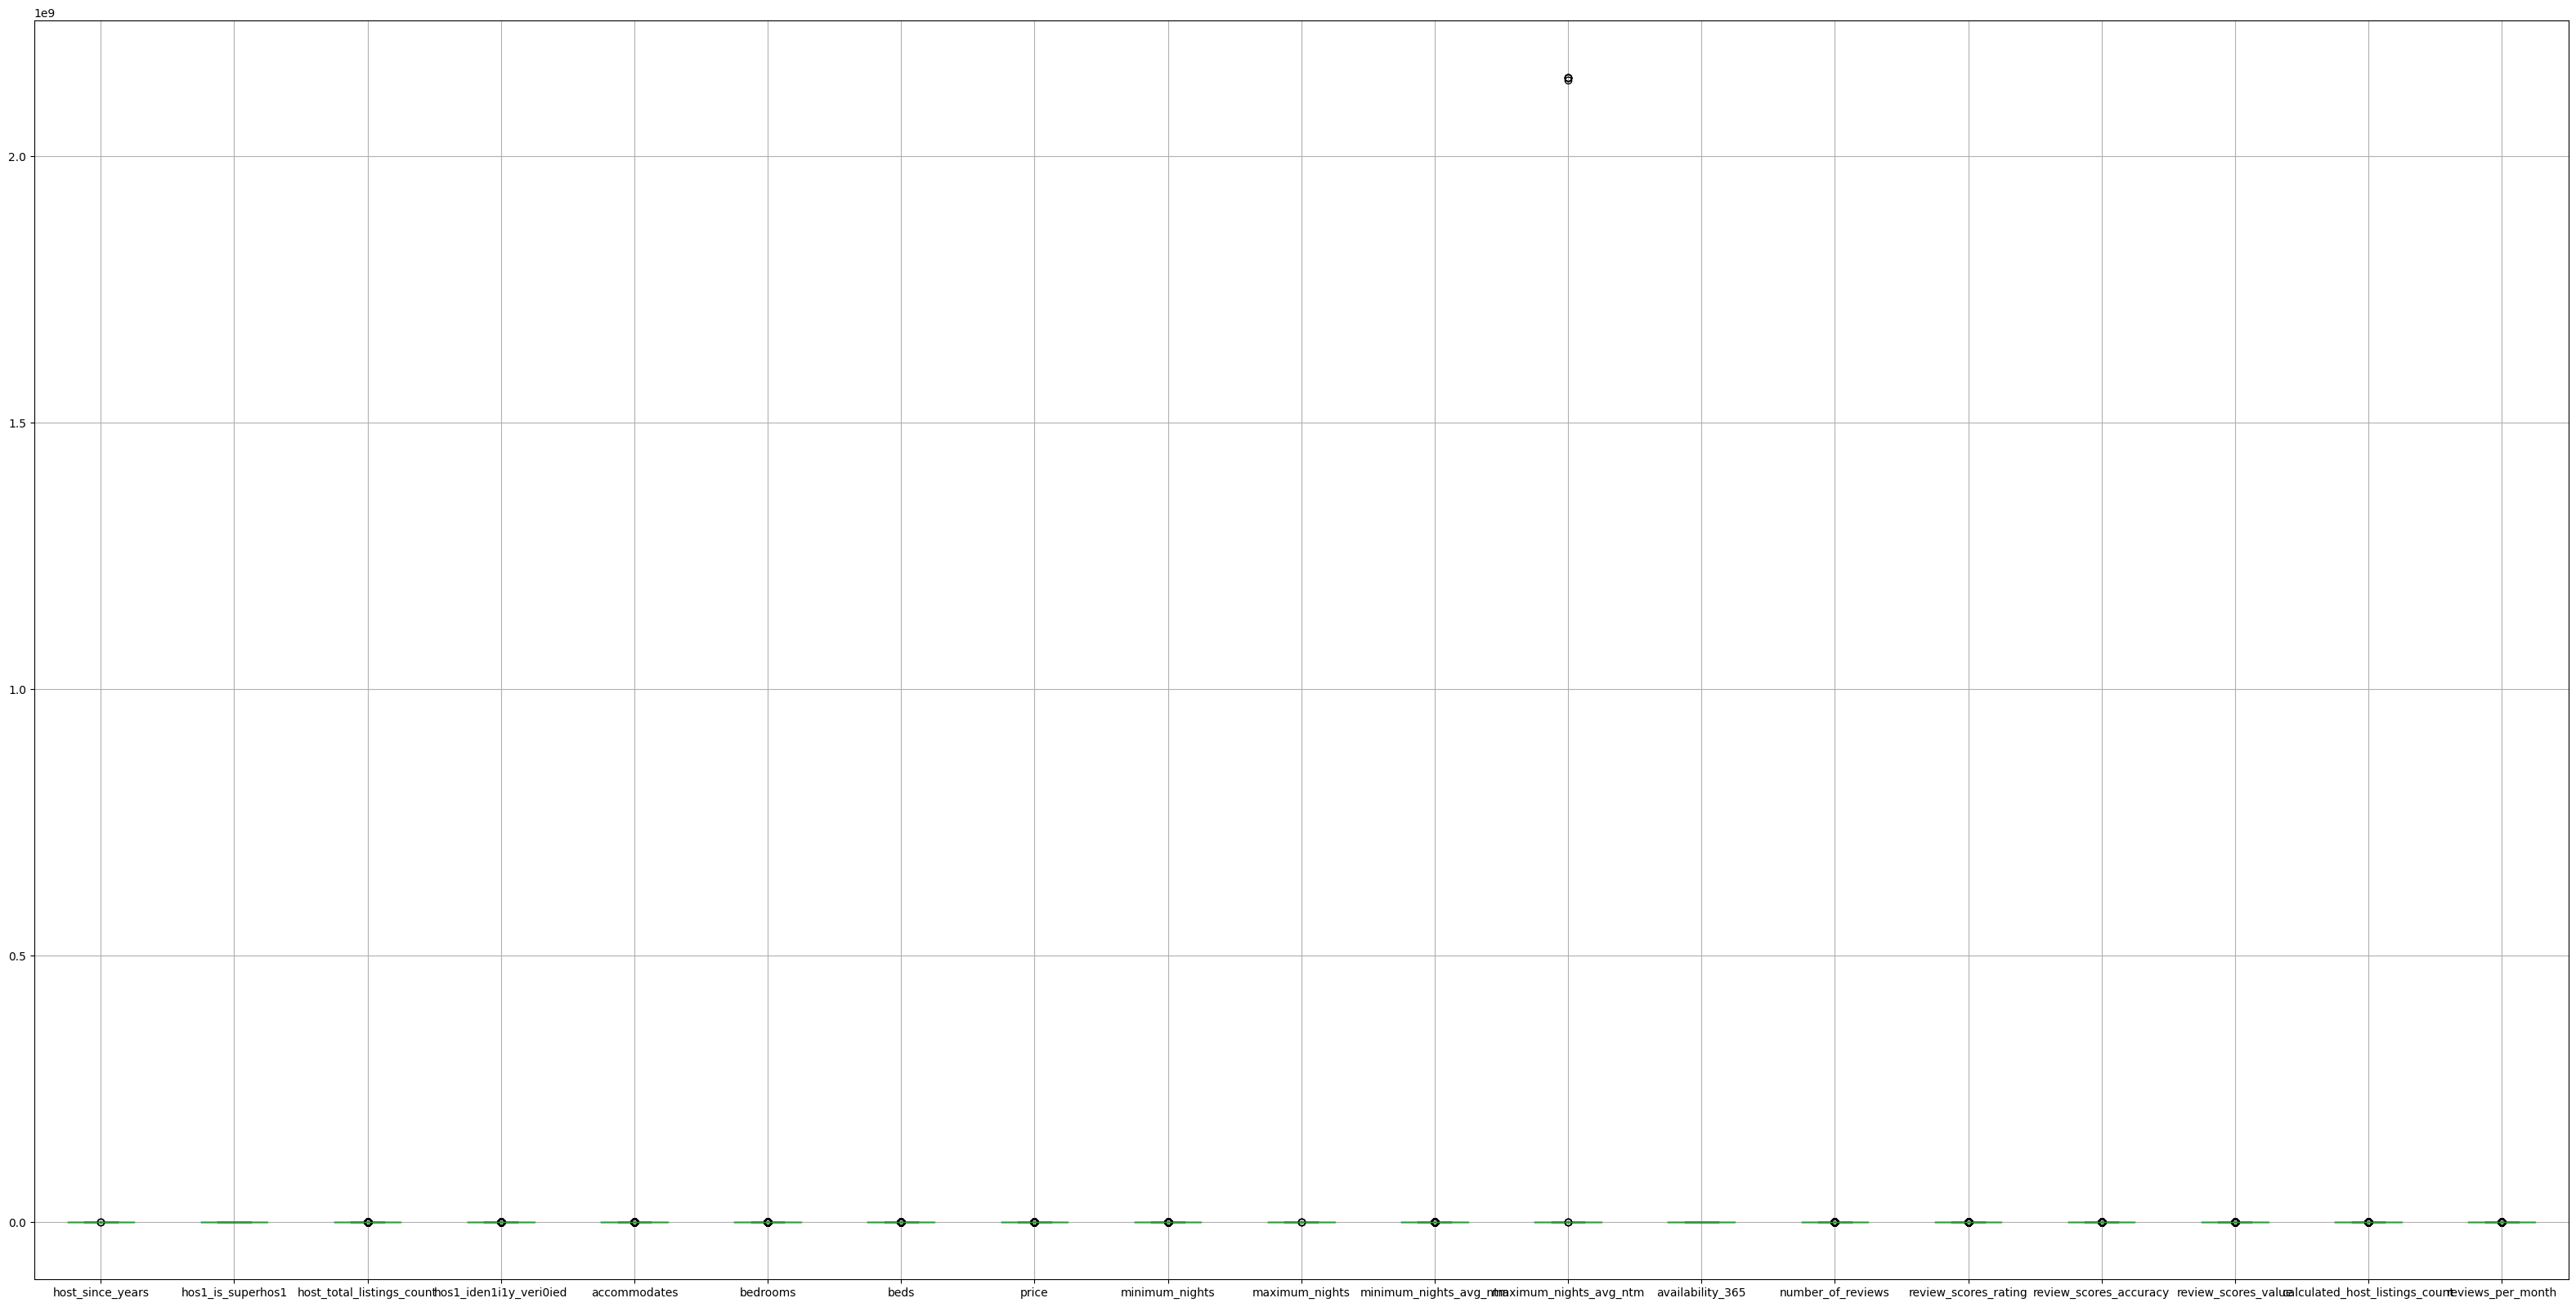

In [ ]:
fig = plt.figure(figsize=(40, 20))
df3.boxplot()
plt.show()

We can see that the dataset needs more cleaning due to 
1. The size of the data being proccessed
2. the variables we dont think are of any value for this regression mdel

# Boolean Variables

In [ ]:
df3['has_availability'] = df3['has_availability'].map({'t': 1, 'f': 0})

In [ ]:
df3['instant_bookable'] = df3['instant_bookable'].map({'t': 1, 'f': 0})

In [ ]:
df3['Bathroom type'] = df3['Bathroom type'].map({'private': 1, 'shared': 0})

#Heatmap

In [ ]:
import seaborn as sns

<ipython-input-30-d3b618c99673>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(),cmap='crest',annot=True)


<Axes: >

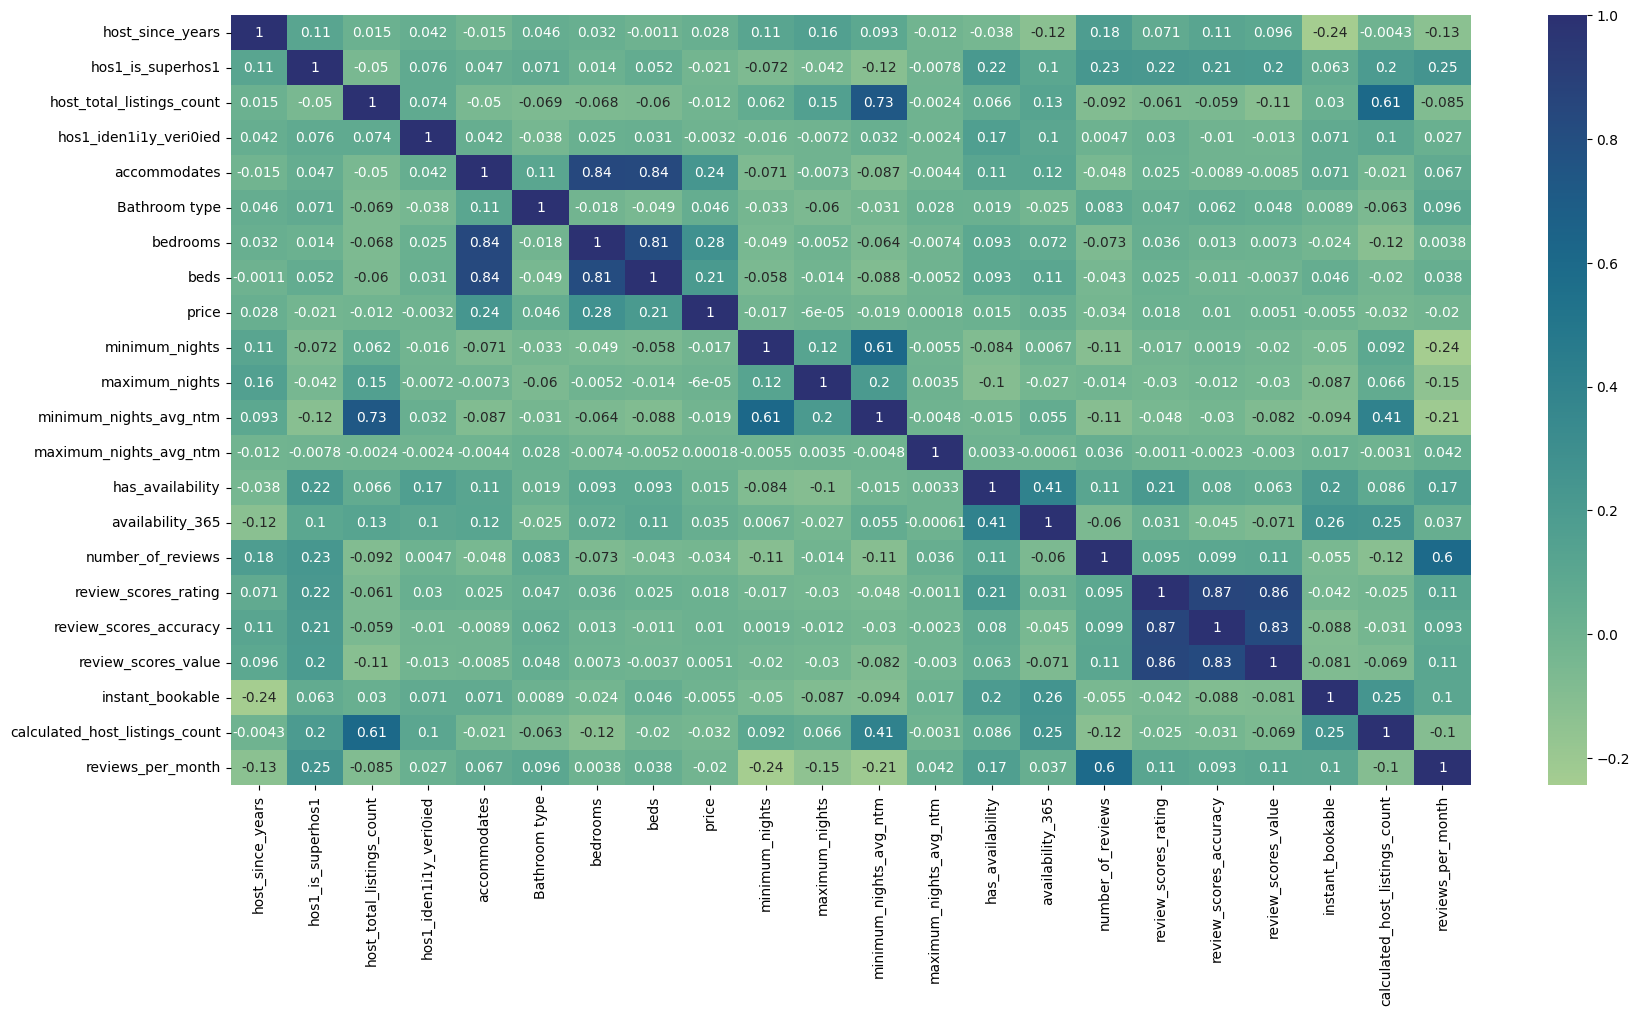

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df3.corr(),cmap='crest',annot=True)

In [ ]:
df3.corr()

<ipython-input-31-cf5c64484bf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,host_since_years,hos1_is_superhos1,host_total_listings_count,hos1_iden1i1y_veri0ied,accommodates,Bathroom type,bedrooms,beds,price,minimum_nights,...,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
host_since_years,1.000000,0.112030,0.015179,0.042216,-0.014871,0.046313,0.032113,-0.001088,0.027891,0.111227,...,-0.012042,-0.038108,-0.123002,0.184908,0.071341,0.113442,0.095677,-0.242176,-0.004350,-0.128978
hos1_is_superhos1,0.112030,1.000000,-0.049973,0.076002,0.046816,0.070551,0.014232,0.052331,-0.021177,-0.071946,...,-0.007835,0.217218,0.100345,0.232936,0.219714,0.206879,0.198481,0.062796,0.196629,0.254372
host_total_listings_count,0.015179,-0.049973,1.000000,0.074045,-0.049914,-0.068913,-0.068181,-0.060244,-0.011659,0.061506,...,-0.002389,0.066036,0.126444,-0.091711,-0.060698,-0.058954,-0.113394,0.030307,0.605843,-0.085420
hos1_iden1i1y_veri0ied,0.042216,0.076002,0.074045,1.000000,0.041727,-0.037615,0.025408,0.030961,-0.003217,-0.015563,...,-0.002426,0.166609,0.101382,0.004724,0.029968,-0.010231,-0.013128,0.070936,0.102386,0.026855
accommodates,-0.014871,0.046816,-0.049914,0.041727,1.000000,0.106665,0.840373,0.835578,0.240987,-0.070755,...,-0.004408,0.114698,0.120199,-0.048050,0.025433,-0.008860,-0.008515,0.071258,-0.021417,0.066993
Bathroom type,0.046313,0.070551,-0.068913,-0.037615,0.106665,1.000000,-0.018051,-0.048721,0.045797,-0.033223,...,0.027810,0.018553,-0.025076,0.082560,0.046746,0.061998,0.047751,0.008892,-0.062530,0.096197
bedrooms,0.032113,0.014232,-0.068181,0.025408,0.840373,-0.018051,1.000000,0.810972,0.283851,-0.048516,...,-0.007439,0.092637,0.071831,-0.072890,0.036275,0.013117,0.007338,-0.024322,-0.119517,0.003811
beds,-0.001088,0.052331,-0.060244,0.030961,0.835578,-0.048721,0.810972,1.000000,0.209497,-0.057903,...,-0.005211,0.093448,0.106333,-0.043387,0.024998,-0.010595,-0.003671,0.045709,-0.020226,0.038277
price,0.027891,-0.021177,-0.011659,-0.003217,0.240987,0.045797,0.283851,0.209497,1.000000,-0.017106,...,0.000178,0.014727,0.034822,-0.034310,0.017595,0.009958,0.005085,-0.005464,-0.032173,-0.019689
minimum_nights,0.111227,-0.071946,0.061506,-0.015563,-0.070755,-0.033223,-0.048516,-0.057903,-0.017106,1.000000,...,-0.005484,-0.084214,0.006696,-0.111946,-0.016580,0.001916,-0.020150,-0.049704,0.091706,-0.244335


.#Histograms

array([[<Axes: title={'center': 'host_since_years'}>,
        <Axes: title={'center': 'hos1_is_superhos1'}>,
        <Axes: title={'center': 'host_total_listings_count'}>,
        <Axes: title={'center': 'hos1_iden1i1y_veri0ied'}>,
        <Axes: title={'center': 'accommodates'}>],
       [<Axes: title={'center': 'Bathroom type'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'maximum_nights'}>,
        <Axes: title={'center': 'minimum_nights_avg_ntm'}>,
        <Axes: title={'center': 'maximum_nights_avg_ntm'}>,
        <Axes: title={'center': 'has_availability'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'review_scores_accuracy'}>,
        <Axes: title={'cente

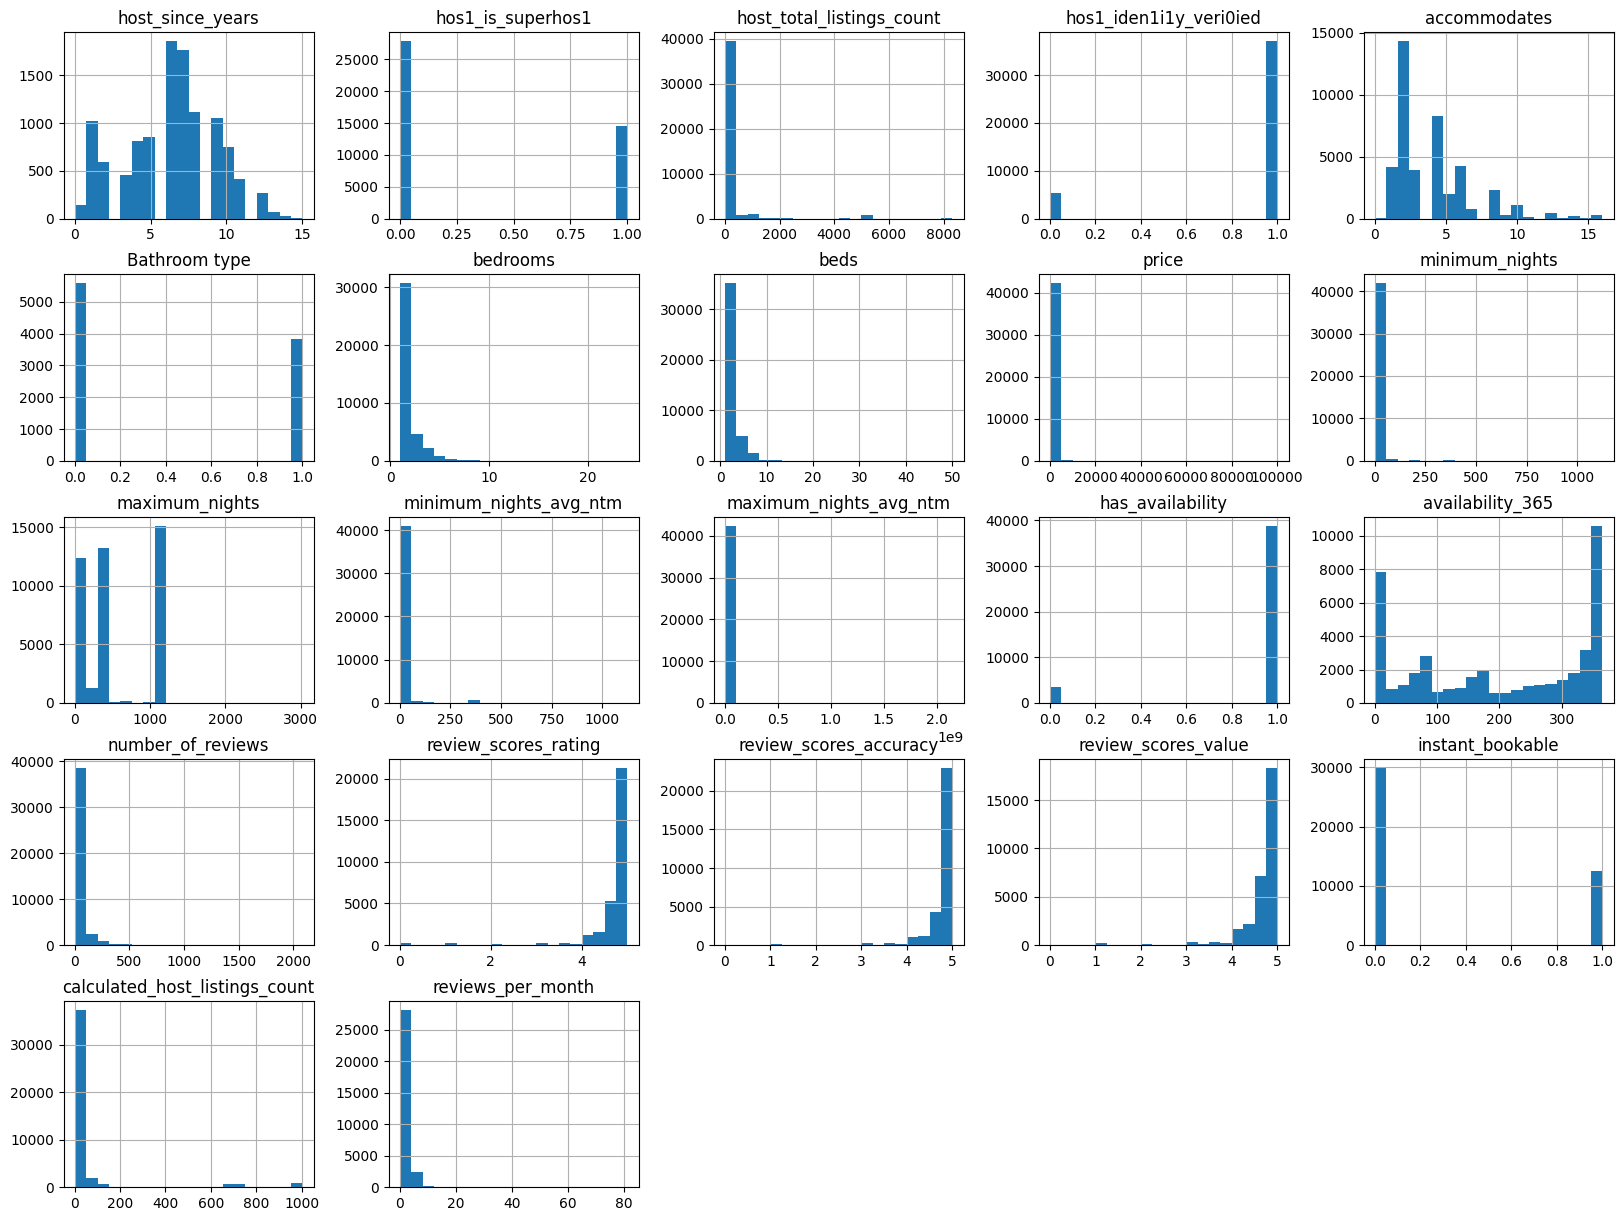

In [ ]:
df3.hist(figsize=(20,15), bins=20)

# Cleaning and Removing null variables

We will create df4 to carry out regression 1 without date and time values.

We will then create df5 to carry out regression 2 with date and time values converted to integer values either via excel or python itself.

In [ ]:
df3.dtypes

host_since_years                  float64
hos1_is_superhos1                 float64
host_total_listings_count         float64
hos1_iden1i1y_veri0ied            float64
accommodates                        int64
Bathroom type                     float64
Unnamed: 38                        object
bedrooms                          float64
beds                              float64
price                               int64
minimum_nights                      int64
maximum_nights                      int64
minimum_nights_avg_ntm            float64
maximum_nights_avg_ntm            float64
has_availability                    int64
availability_365                    int64
calendar_last_scraped              object
number_of_reviews                   int64
first_review                       object
last_review                        object
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_value               float64
instant_bookable                  

In [ ]:
df4 = df3.dropna(how='all', axis=0)  #removing all null values

In [ ]:
df3.head(10)

,host_since_years,hos1_is_superhos1,host_total_listings_count,hos1_iden1i1y_veri0ied,accommodates,Bathroom type,Unnamed: 38,bedrooms,beds,price,...,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,1.0,0.0,1.0,1.0,7,NaN,NaN,4.0,3.0,399,...,3/7/23,0,NaN,NaN,NaN,NaN,NaN,0,1,NaN
1,1.0,1.0,5.0,1.0,2,0.0,bath,1.0,1.0,46,...,3/7/23,5,9/15/22,1/16/23,5.00,5.00,4.40,0,4,0.86
2,8.0,0.0,22.0,1.0,3,NaN,NaN,1.0,1.0,408,...,3/7/23,53,6/3/16,11/26/22,4.92,4.90,4.83,0,10,0.64
3,5.0,1.0,6.0,1.0,2,0.0,bath,1.0,1.0,80,...,3/7/23,44,11/17/19,2/24/23,4.80,4.75,4.82,1,4,1.09
4,11.0,0.0,6.0,1.0,8,NaN,NaN,3.0,4.0,2138,...,3/7/23,15,5/23/16,7/30/18,4.79,4.86,4.36,0,1,0.18
5,8.0,0.0,4.0,1.0,1,0.0,bath,1.0,2.0,55,...,3/9/23,3,2/17/23,2/24/23,5.00,5.00,5.00,0,1,3.00
6,9.0,0.0,19.0,1.0,1,NaN,NaN,1.0,1.0,60,...,3/7/23,12,11/20/21,11/13/22,4.33,4.17,4.42,0,2,0.76
7,4.0,0.0,1.0,1.0,2,NaN,NaN,1.0,1.0,55,...,3/7/23,81,6/2/19,3/3/23,4.94,4.94,4.88,0,1,1.77
8,1.0,0.0,1.0,1.0,2,NaN,NaN,1.0,1.0,129,...,3/7/23,1,1/6/23,1/6/23,5.00,5.00,5.00,1,1,0.49
9,5.0,1.0,1.0,1.0,2,NaN,NaN,1.0,1.0,107,...,3/7/23,72,1/20/22,2/19/23,4.90,4.92,4.86,0,1,5.24


In [ ]:
df4=='NaN'

,host_since_years,hos1_is_superhos1,host_total_listings_count,hos1_iden1i1y_veri0ied,accommodates,Bathroom type,Unnamed: 38,bedrooms,beds,price,...,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42446,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df3.shape

(42450, 26)

In [ ]:
df4.shape

(42450, 26)

In [ ]:
#df4['host_total_listings_count'] == 'NaN'
count =0

for i in df4['beds']:
  if i == 'NaN':
    count +=1

In [ ]:
df4.dropna(axis=0, how='any', inplace=True)
df4.dropna(axis=0, thresh=2, subset=['host_since_years', 'hos1_is_superhos1', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_365', 'number_of_reviews', 'calculated_host_listings_count'], inplace=True)

In [ ]:
df4.shape

(1757, 26)

In [ ]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,n,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7.774520e+17,https://www.airbnb.com/rooms/777451666060243581,2.023030e+13,3/7/23,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,6.980980e+17,https://www.airbnb.com/rooms/698097753730921190,2.023030e+13,3/7/23,city scrape,æ–¹ä¾¿æ˜“å±…é©¿ç«™,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,1.306312e+07,https://www.airbnb.com/rooms/13063118,2.023030e+13,3/7/23,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,3.933708e+07,https://www.airbnb.com/rooms/39337076,2.023030e+13,3/7/23,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/Hosting-...,208375458,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,1.307763e+07,https://www.airbnb.com/rooms/13077628,2.023030e+13,3/7/23,city scrape,Zuma Malibu Retreat,Our Private 16 Acre Malibu Retreat is located ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4182067,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42446,1.728670e+07,https://www.airbnb.com/rooms/17286704,2.023030e+13,3/7/23,city scrape,"2. Private Rm, Large 3 Bedrm House RV/TruckPar...",You will love this beautiful private room in a...,The neighborhood is in a residential area and ...,https://a0.muscache.com/pictures/76268018-ffb0...,38106741,...,4.83,4.75,4.75,NaN,f,3,0,3,0,0.42
42447,7.510770e+17,https://www.airbnb.com/rooms/751077061221390362,2.023030e+13,3/7/23,city scrape,Private Half Bathroom | Master Bedroom,Welcome to our beautiful family home. It is a ...,The house is in a desirable residential family...,https://a0.muscache.com/pictures/miso/Hosting-...,412524751,...,5.00,5.00,5.00,NaN,f,5,0,5,0,1.07
42448,6.630300e+17,https://www.airbnb.com/rooms/663030240787490751,2.023030e+13,3/7/23,city scrape,RoomA,Welcome to my home!<br /> I have a dog in my b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,38884077,...,5.00,5.00,5.00,NaN,f,5,0,5,0,1.00
42449,1.587654e+07,https://www.airbnb.com/rooms/15876540,2.023030e+13,3/7/23,city scrape,En-Suite Room & Hotel Inspired Amenities.,En-Suite room and only room in 1st floor for g...,"We are 16 Miles to downtown LA, 24 miles to Di...",https://a0.muscache.com/pictures/539d383c-4529...,102942389,...,4.93,4.74,4.83,NaN,t,3,0,3,0,3.77


#1st Regression Analysis

In [ ]:
X=df4[['host_since_years','hos1_is_superhos1','host_total_listings_count','accommodates','bedrooms','beds','minimum_nights','maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_365','number_of_reviews','calculated_host_listings_count']]

In [ ]:
Y=df4['price']

In [ ]:
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor
import statsmodels.formula.api as sm

In [ ]:
regra=linear_model.LinearRegression()

In [ ]:
regra.fit(X,Y)

LinearRegression()

In [ ]:
regra.predict(X)

array([75.76706738, 68.04113966, 54.91306738, ..., 85.73810276,
       84.27681946, 98.08899981])

In [ ]:
regra.score(X,Y)

0.015811256371170868

In [ ]:
regra.intercept_

28.691624188172618

In [ ]:
regra.coef_.tolist()

[2.377680361573344,
 -13.57216679297364,
 -0.5953174918882423,
 19.072822705350987,
 29.260923894598502,
 -4.560659085303979,
 1.1659972645542098,
 -0.027259760065984958,
 -1.131001295479017,
 7.277848013131916e-08,
 0.013330046388698627,
 0.11834164681840836,
 0.5976431071249069]

In [ ]:
df4.shape

(1757, 26)

#1st Regr Correlation Matrix

In [ ]:
df4_corr = df4[['price','host_since_years','hos1_is_superhos1','host_total_listings_count','accommodates','bedrooms','beds','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_365','number_of_reviews','calculated_host_listings_count']]

In [ ]:
df4['price'].describe()

count    1757.000000
mean       90.472965
std       249.093870
min        10.000000
25%        50.000000
50%        65.000000
75%        90.000000
max      8899.000000
Name: price, dtype: float64

In [ ]:
df4_corr.corr()

,price,host_since_years,hos1_is_superhos1,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,calculated_host_listings_count
price,1.000000,0.030897,-0.011021,-0.016758,0.080161,0.049765,0.019660,-0.005243,0.031808,-0.002902,0.052635,-0.003902
host_since_years,0.030897,1.000000,0.088583,-0.039286,0.016365,0.010646,0.034915,0.101768,-0.028988,-0.010827,0.190337,-0.025792
hos1_is_superhos1,-0.011021,0.088583,1.000000,-0.002651,-0.053243,-0.015104,-0.053838,-0.043310,-0.028807,0.095045,0.253075,0.046183
host_total_listings_count,-0.016758,-0.039286,-0.002651,1.000000,0.097578,-0.021217,0.062722,0.012227,-0.009196,0.153408,-0.067266,0.944114
accommodates,0.080161,0.016365,-0.053243,0.097578,1.000000,0.250977,0.373992,-0.061136,0.001424,0.042602,0.056526,0.083090
bedrooms,0.049765,0.010646,-0.015104,-0.021217,0.250977,1.000000,0.174608,-0.023672,-0.005707,0.031091,-0.035671,-0.013748
beds,0.019660,0.034915,-0.053838,0.062722,0.373992,0.174608,1.000000,0.011142,0.004147,0.067741,-0.021813,0.062267
minimum_nights_avg_ntm,-0.005243,0.101768,-0.043310,0.012227,-0.061136,-0.023672,0.011142,1.000000,-0.014669,0.040854,-0.053958,0.017581
maximum_nights_avg_ntm,0.031808,-0.028988,-0.028807,-0.009196,0.001424,-0.005707,0.004147,-0.014669,1.000000,0.031904,0.194092,-0.004466
availability_365,-0.002902,-0.010827,0.095045,0.153408,0.042602,0.031091,0.067741,0.040854,0.031904,1.000000,0.005646,0.096249


<Axes: >

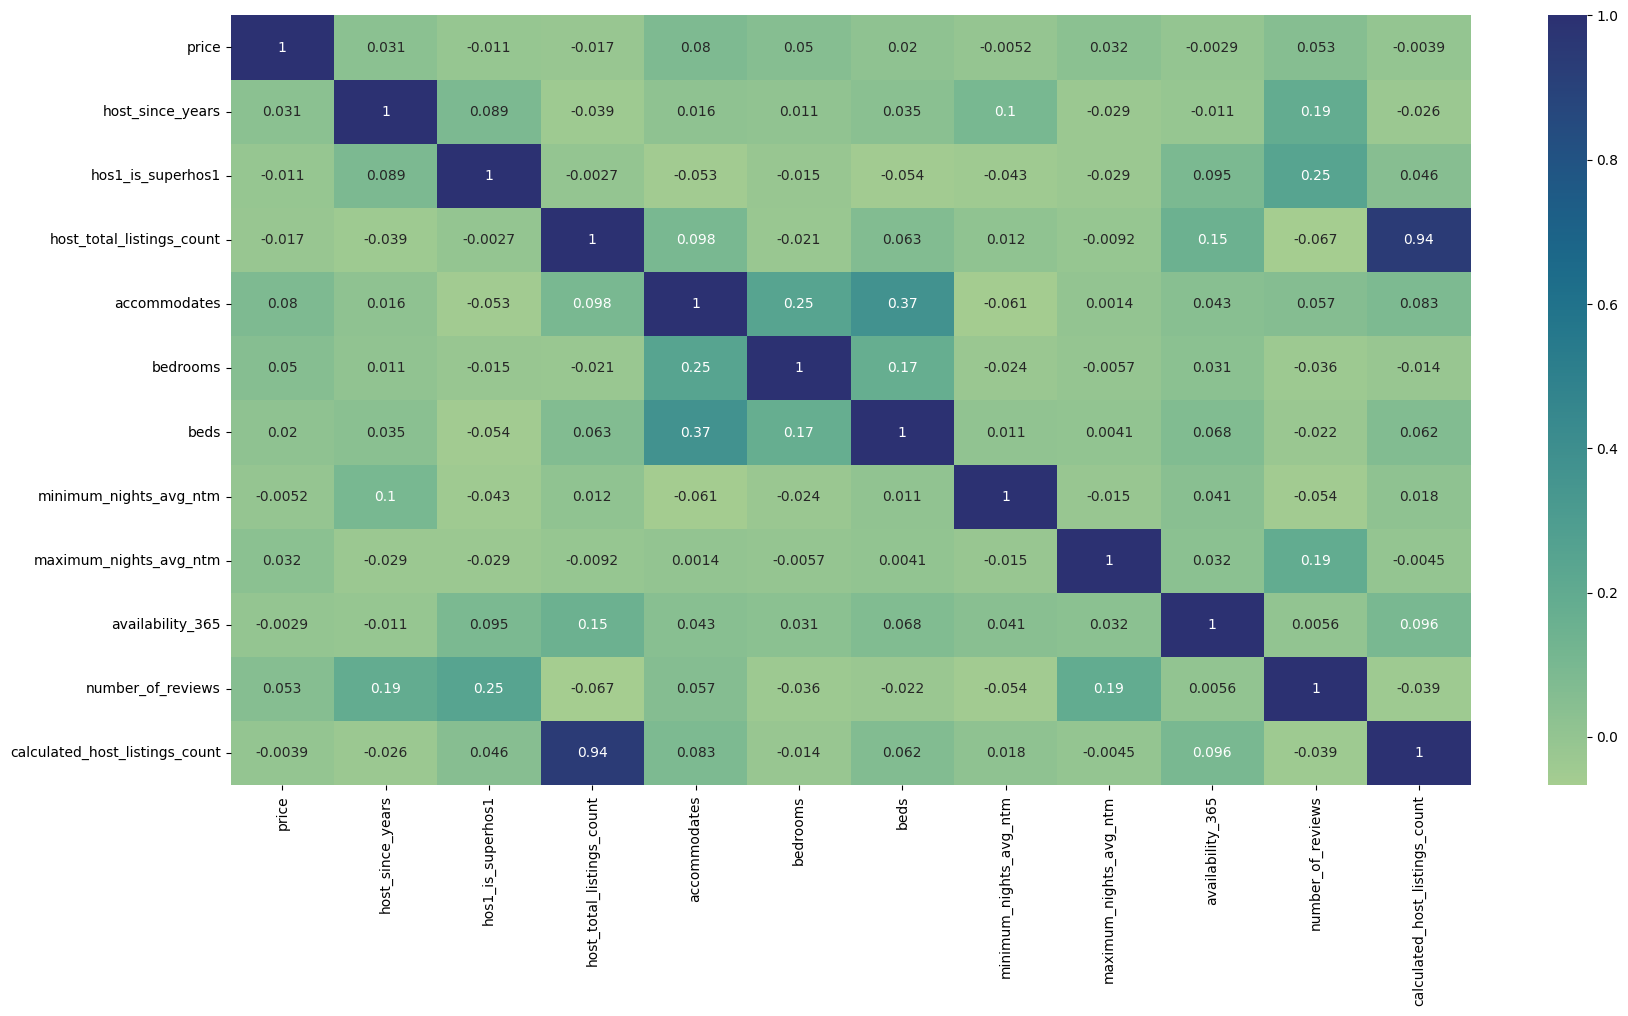

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df4_corr.corr(),cmap='crest',annot=True)

#Bivariate Analysis

In [ ]:
x=df4[['accommodates']]

In [ ]:
y=df4[['price']]

Text(0, 0.5, 'Price')

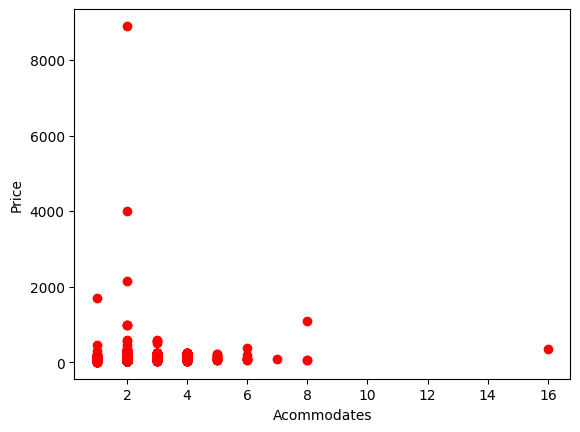

In [ ]:
plt.scatter(x,y,c='r')
plt.xlabel('Acommodates')
plt.ylabel('Price')

In [ ]:
dfprice= df4[df4['price'] <= 1000]


In [ ]:
x=dfprice[['accommodates']]

In [ ]:
y=dfprice[['price']]

Text(0, 0.5, 'Price')

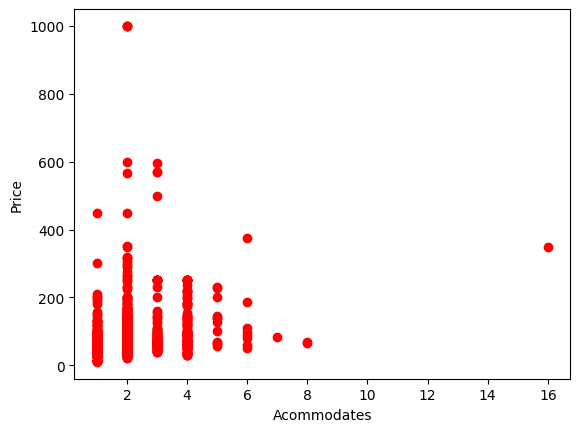

In [ ]:
plt.scatter(x,y,c='r')
plt.xlabel('Acommodates')
plt.ylabel('Price')

# 1st Residual Analysis

In [ ]:
df4_resid=df4

In [ ]:
regr1=regra

In [ ]:
regr1.fit(X,Y)


LinearRegression()

In [ ]:
df4_resid['predicted_price'] = regr1.predict(X)

In [ ]:
df4_resid['residuals'] = df4_resid['price']-df4_resid['predicted_price']

In [ ]:
df4_resid['residuals'].head(10)

1    -29.767067
3     11.958860
5      0.086933
15   -35.067302
16    68.894941
20   -34.204682
21   -47.024778
23    16.955882
24   -59.653402
30   -36.942974
Name: residuals, dtype: float64

<Axes: >

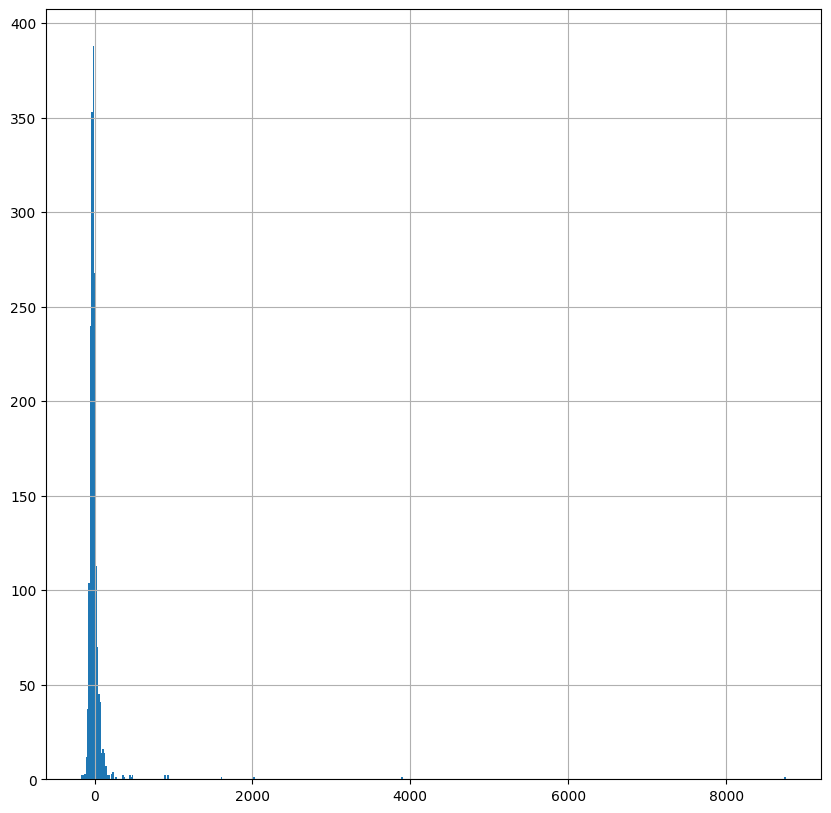

In [ ]:
df4_resid['residuals'].hist(figsize=(10,10), bins=500)


In [ ]:
df4['hos1_is_superhos1'].describe()

count    1757.000000
mean        0.326693
std         0.469138
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: hos1_is_superhos1, dtype: float64

In [ ]:
df4['hos1_is_superhos1']==1

1         True
3         True
5        False
15        True
16       False
         ...  
11181    False
11190    False
11194     True
11212     True
11222     True
Name: hos1_is_superhos1, Length: 1757, dtype: bool

#Dropping Multiple Columns

We drop all the columns below based on their high correlation witih another similar column and based on their very little correlation with other variables. 

In [ ]:
df5 = df4.drop(['minimum_nights', 'maximum_nights', 'review_scores_accuracy', 'review_scores_value', 'reviews_per_month', 'beds', 'bedrooms', 'calculated_host_listings_count', 'Bathroom type', 'Unnamed: 38', 'first_review', 'last_review', 'predicted_price','calendar_last_scraped','residuals' ], axis=1)


In [ ]:
df5.head(10)

,host_since_years,hos1_is_superhos1,host_total_listings_count,hos1_iden1i1y_veri0ied,accommodates,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,review_scores_rating,instant_bookable
1,1.0,1.0,5.0,1.0,2,46,6.0,90.0,1,87,5,5.00,0
3,5.0,1.0,6.0,1.0,2,80,2.0,1125.0,1,357,44,4.80,1
5,8.0,0.0,4.0,1.0,1,55,2.0,1125.0,1,1,3,5.00,0
15,8.0,1.0,3.0,1.0,2,39,1.0,1125.0,1,365,24,4.79,0
16,3.0,0.0,185.0,1.0,2,39,31.0,1125.0,1,338,41,4.63,0
20,3.0,0.0,33.0,0.0,2,52,1.0,1125.0,1,2,3,4.67,0
21,8.0,0.0,9.0,1.0,2,61,5.0,30.0,1,27,1,5.00,0
23,0.0,0.0,3.0,1.0,2,80,1.0,1125.0,1,187,2,5.00,0
24,6.0,0.0,5.0,1.0,2,41,1.0,1125.0,1,357,5,5.00,1
30,5.0,1.0,3.0,1.0,1,38,1.0,1125.0,1,279,5,5.00,1


In [ ]:
df5.shape

(1757, 13)

In [ ]:
df5.dtypes

host_since_years             float64
hos1_is_superhos1            float64
host_total_listings_count    float64
hos1_iden1i1y_veri0ied       float64
accommodates                   int64
price                          int64
minimum_nights_avg_ntm       float64
maximum_nights_avg_ntm       float64
has_availability               int64
availability_365               int64
number_of_reviews              int64
review_scores_rating         float64
instant_bookable               int64
dtype: object

#2nd Regression

In [ ]:
X=df5[['host_since_years','hos1_is_superhos1','host_total_listings_count','hos1_iden1i1y_veri0ied','accommodates','minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','availability_365','number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
regrb = regra

In [ ]:
regrb.fit(X,Y)


LinearRegression()

In [ ]:
regrb.predict(X)


array([69.19350742, 88.60862059, 78.18859921, ..., 79.70396038,
       59.22012275, 82.85579018])

In [ ]:
regrb.score(X,Y)

0.011608404790173443

In [ ]:
Y=df5['price']

#1st Step Wise Analysis

Removing host_since_years

In [ ]:
X=df5[['hos1_is_superhos1','host_total_listings_count','hos1_iden1i1y_veri0ied','accommodates','minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','availability_365','number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr1=regra

In [ ]:
regr1.fit(X,Y)


LinearRegression()

In [ ]:
regr1.score(X,Y)

0.010990293553235553

Removing host_since_years made the regression worse, so we are keeping it in and removing the next column

#2nd Step Wise Analysis

Removing host_is_superhost

In [ ]:
X=df5[['host_total_listings_count','hos1_iden1i1y_veri0ied','accommodates','minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','availability_365','number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr2=regr1

In [ ]:
regr2.fit(X,Y)


LinearRegression()

In [ ]:
regr2.score(X,Y)

0.010482491060746835

It made it worse so we are keeping it

#3rd Step Wise Analysis

Removing host_total_listings_count

In [ ]:
X=df5[['hos1_iden1i1y_veri0ied','accommodates','minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','availability_365','number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr3=regr2

In [ ]:
regr3.fit(X,Y)


LinearRegression()

In [ ]:
regr3.score(X,Y)

0.010032454863880491

it made it better so we are leaving it out

# 4th Step Analysis

removing host_identity_verified

best score now = 0.011189873003152218

In [ ]:
X=df5[['accommodates','minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','availability_365','number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr4=regr3

In [ ]:
regr4.fit(X,Y)


LinearRegression()

In [ ]:
regr4.score(X,Y)

0.009979832444791059

it made it worse so we are keeping it back in

#5th Step Wise Analysis

Removing accomodates
best score now = 0.011189873003152218

In [ ]:
X=df5[['minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','availability_365','number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr5=regr4

In [ ]:
regr5.fit(X,Y)

LinearRegression()

In [ ]:
regr5.score(X,Y)

0.003980933601529957

it made it worse, and we discover accomodates is very important because of how many points the regr score dropped by

#6th Step Wise Analysis

Remooving minimum_nights_avg_ntm
best score now = 0.011189873003152218

In [ ]:
X=df5[['maximum_nights_avg_ntm','has_availability','availability_365','number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr6=regr5

In [ ]:
regr6.fit(X,Y)

LinearRegression()

In [ ]:
regr6.score(X,Y)

0.003980577666491847

It made it worse

#7th Step Wise Regression Analysis

Removing maximum_nights_avg_ntm

In [ ]:
X=df5[['has_availability','availability_365','number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr7=regr6

In [ ]:
regr7.fit(X,Y)

LinearRegression()

In [ ]:
regr7.score(X,Y)

0.0035363694246208777

It made it worse so we are keeping it

#8th Step Wise Regression Analysis

Removing has_availability

best score is from 3rd step wise


In [ ]:
X=df5[['availability_365','number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr8=regr7

In [ ]:
...

Ellipsis

In [ ]:
regr8.fit(X,Y)

LinearRegression()

In [ ]:
regr8.score(X,Y)

0.0034636753742699478

it made it worse

#9th Step Wise Analysis


Removing availability_365

In [ ]:
X=df5[['number_of_reviews','review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr9=regr8

In [ ]:
regr9.fit(X,Y)

LinearRegression()

In [ ]:
regr9.score(X,Y)

0.0034261686299427163

it made it worse

#10th Step Wise Analysis

Removing number of reviews

In [ ]:
X=df5[['review_scores_rating', 'instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr10=regr9

In [ ]:
regr10.fit(X,Y)

LinearRegression()

In [ ]:
regr10.score(X,Y)

0.0009154468155641027

it made it much worse

#11th Step Wise Analysis

Removing review_scores_rating

In [ ]:
X=df5[['instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr11=regr10

In [ ]:
regr11.fit(X,Y)

LinearRegression()

In [ ]:
regr11.score(X,Y)

0.000590123100115747

It made it worse so we are keeping it

#12th Step Wise Regression Analysis

Removing instant_bookable

In [ ]:
X=df5[['instant_bookable']]

In [ ]:
Y=df5['price']

In [ ]:
regr12=regr11

In [ ]:
regr12.fit(X,Y)

LinearRegression()

In [ ]:
regr12.score(X,Y)

0.000590123100115747

In [ ]:
df5['price'].describe()

count    1757.000000
mean       90.472965
std       249.093870
min        10.000000
25%        50.000000
50%        65.000000
75%        90.000000
max      8899.000000
Name: price, dtype: float64

In [ ]:
df5.describe()

,host_since_years,hos1_is_superhos1,host_total_listings_count,hos1_iden1i1y_veri0ied,accommodates,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,review_scores_rating,instant_bookable
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1.757000e+03,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000
mean,6.141150,0.326693,14.788845,0.846898,1.966989,90.472965,12.422937,3.667480e+06,0.906090,168.114400,43.641434,4.727718,0.215709
std,3.055578,0.469138,53.030983,0.360188,0.958740,249.093870,32.214392,8.868639e+07,0.291787,142.919104,86.326716,0.486001,0.411430
min,0.000000,0.000000,1.000000,0.000000,1.000000,10.000000,1.000000,1.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000
25%,4.000000,0.000000,2.000000,1.000000,1.000000,50.000000,1.000000,3.650000e+02,1.000000,27.000000,4.000000,4.670000,0.000000
50%,6.000000,0.000000,5.000000,1.000000,2.000000,65.000000,2.000000,1.125000e+03,1.000000,129.000000,13.000000,4.880000,0.000000
75%,8.000000,1.000000,11.000000,1.000000,2.000000,90.000000,30.000000,1.125000e+03,1.000000,336.000000,43.000000,5.000000,0.000000
max,14.000000,1.000000,1007.000000,1.000000,16.000000,8899.000000,1111.000000,2.147484e+09,1.000000,365.000000,1020.000000,5.000000,1.000000
